In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc,accuracy_score
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler


In [5]:
df = pd.read_csv(r'C:\Users\VAISHALI\Downloads\data.csv')

In [6]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [7]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [8]:
df.shape

(569, 31)

In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [14]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

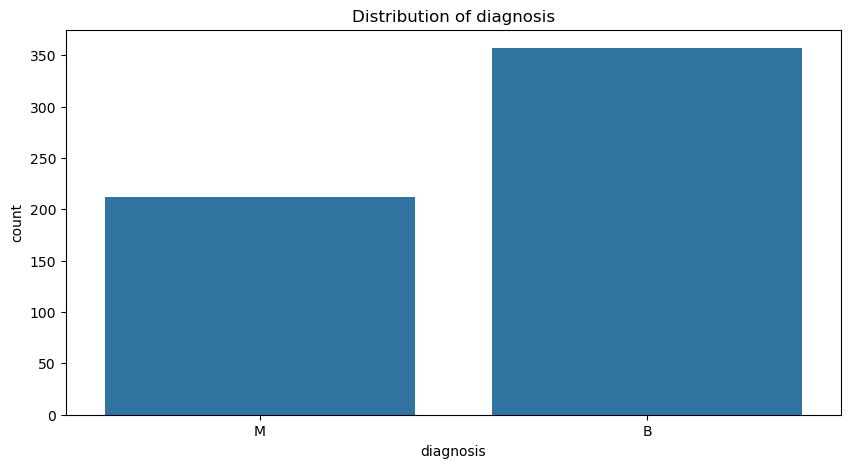

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x = df['diagnosis'])
plt.title('Distribution of diagnosis')
plt.show()

In [16]:
def ouitlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = ouitlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [17]:
new_df=df
le =LabelEncoder()
le.fit(new_df['diagnosis'])
le.classes_

array(['B', 'M'], dtype=object)

In [18]:
new_df['Encoder_diagnosis']=le.transform(new_df['diagnosis'])
new_df=new_df.drop('diagnosis',axis=1)

In [19]:
new_df=new_df.astype(float)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [20]:
Corr=new_df.corr()
Corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Encoder_diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


In [21]:
scaler = MinMaxScaler()
columns = new_df.columns
new_df = pd.DataFrame(scaler.fit_transform(new_df))
new_df.columns = columns
new_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Encoder_diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0


In [22]:
X = new_df[new_df.columns[:-1]]
y = new_df['Encoder_diagnosis']

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 ,random_state=42 )

## Logistic Regression

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [52]:
threshold = 0.5

lr_train_proba = lr.predict_proba(X_train)[:, 1]
lr_train_pred = (lr_train_proba >= threshold).astype(int)

lr_test_proba = lr.predict_proba(X_test)[:, 1]
lr_test_pred = (lr_test_proba >= threshold).astype(int)

lr_train_acc = round(accuracy_score(y_train,lr_train_pred)*100,2)
lr_test_acc = round(accuracy_score(y_test,lr_test_pred)*100,2)

print('Test Accuracy = ' , lr_train_acc,' %')
print('Train Accuracy = ' , lr_test_acc,' %')

Test Accuracy =  96.7  %
Train Accuracy =  98.25  %


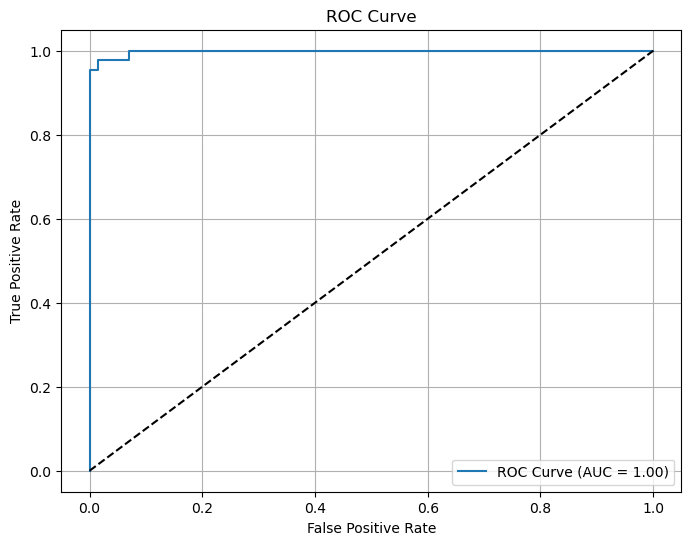

Best Threshold: 0.0


In [57]:
# plotting ROC Curve
lr_fprs, lr_tprs, lr_thresholds = roc_curve(y_test, lr_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(lr_fprs, lr_tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(lr_fprs, lr_tprs)))
#plt.plot(lr_fprs, lr_tprs, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on TPR - FPR
lr_best_threshold_index = np.argmax(lr_tprs - lr_fprs)
lr_best_threshold = thresholds[lr_best_threshold_index]

print("Best Threshold:", lr_best_threshold)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

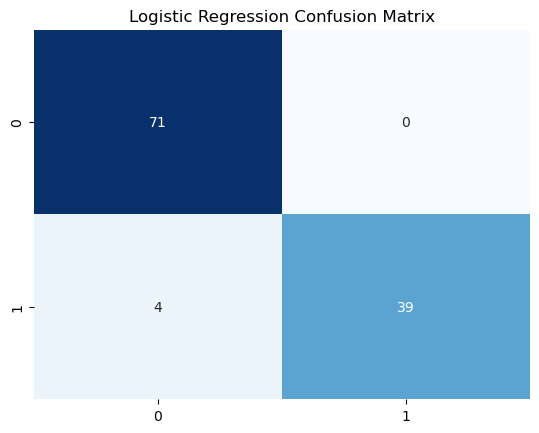

In [48]:
# Predict using the best threshold
lr_test_best_pred = (lr_test_proba >= lr_best_threshold).astype(int)

conf_matrix = confusion_matrix(lr_test_pred, lr_test_best_pred)

sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues', cbar=False,)

plt.title('Logistic Regression Confusion Matrix')

## KNN Classification

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
threshold = 0.8

knn_train_proba = knn.predict_proba(X_train)[:, 1]
knn_train_pred = (knn_train_proba >= threshold).astype(int)

knn_test_proba = knn.predict_proba(X_test)[:, 1]
knn_test_pred = (knn_test_proba >= threshold).astype(int)

knn_train_acc = round(accuracy_score(y_train,knn_train_pred)*100,2)
knn_test_acc = round(accuracy_score(y_test,knn_test_pred)*100,2)

print('Test Accuracy = ' , knn_test_acc,' %')
print('Train Accuracy = ' , knn_train_acc,' %')


Test Accuracy =  93.86  %
Train Accuracy =  95.16  %


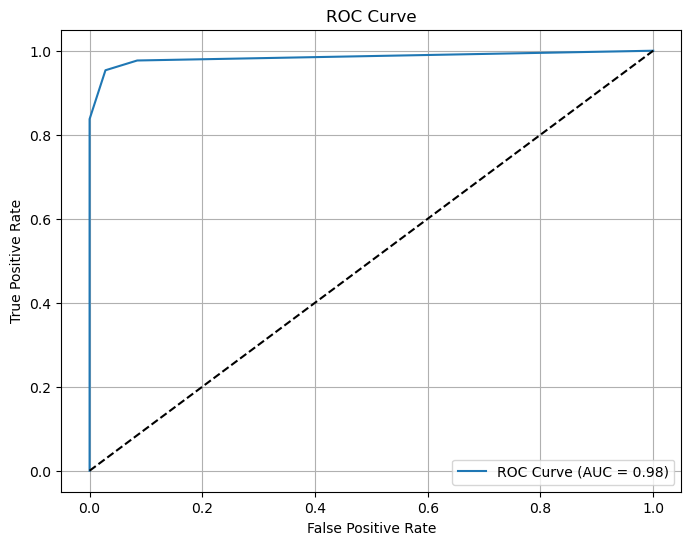

Best Threshold: 0.6666666666666666


In [62]:
# plotting ROC Curve
knn_fprs, knn_tprs, knn_thresholds = roc_curve(y_test, knn_test_proba)

plt.figure(figsize=(8, 6))

plt.plot(knn_fprs, knn_tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(knn_fprs, knn_tprs,)))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on TPR - FPR
knn_best_threshold_index = np.argmax(knn_tprs - knn_fprs)
knn_best_threshold = knn_thresholds[knn_best_threshold_index]

print("Best Threshold:", knn_best_threshold)

Text(0.5, 1.0, 'K-Nearest Neighbors Confusion Matrix')

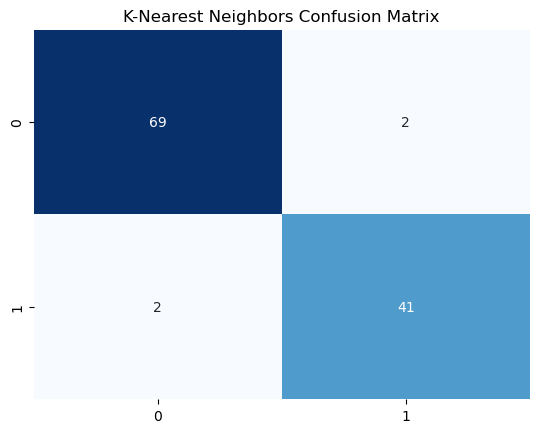

In [59]:
# Predict using the best threshold

knn_test_best_pred = (knn_test_proba >= knn_best_threshold).astype(int)

conf_matrix = confusion_matrix(y_test, knn_test_best_pred)

sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues', cbar=False,)

plt.title('K-Nearest Neighbors Confusion Matrix')


## Decision Tree Classification

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
threshold = 0.5

dt_train_proba = dt.predict_proba(X_train)[:, 1]
dt_train_pred = (dt_train_proba >= threshold).astype(int)

dt_test_proba = dt.predict_proba(X_test)[:, 1]
dt_test_pred = (dt_test_proba >= threshold).astype(int)

dt_train_acc = round(accuracy_score(y_train,dt_train_pred)*100,2)
dt_test_acc = round(accuracy_score(y_test,dt_test_pred)*100,2)

print('Test Accuracy = ' , dt_test_acc,' %')
print('Train Accuracy = ' , dt_train_acc,' %')

Test Accuracy =  94.74  %
Train Accuracy =  100.0  %


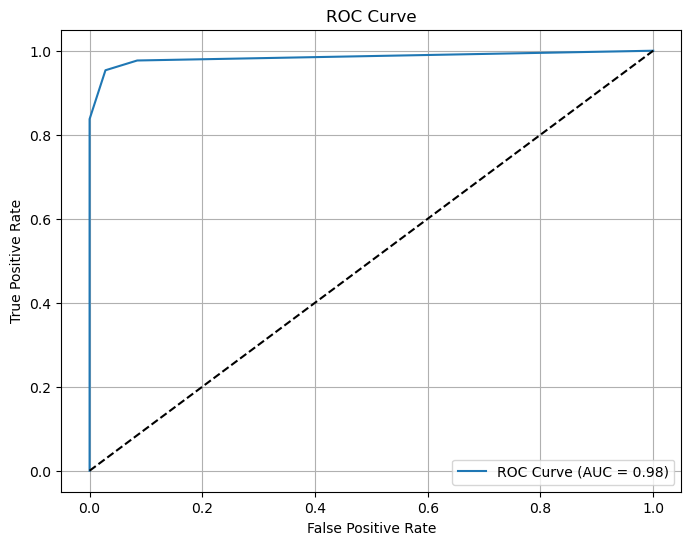

Best Threshold: 1.0


In [64]:
# plotting ROC Curve
dt_fprs, dt_tprs, dt_thresholds = roc_curve(y_test, dt_test_proba)

plt.figure(figsize=(8, 6))

plt.plot(fprs, tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(fprs, tprs)))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on TPR - FPR
dt_best_threshold_index = np.argmax(dt_tprs - dt_fprs)
dt_best_threshold = dt_thresholds[dt_best_threshold_index]

print("Best Threshold:", dt_best_threshold)

Test Accuracy =  93.86  %
Train Accuracy =  100.0  %


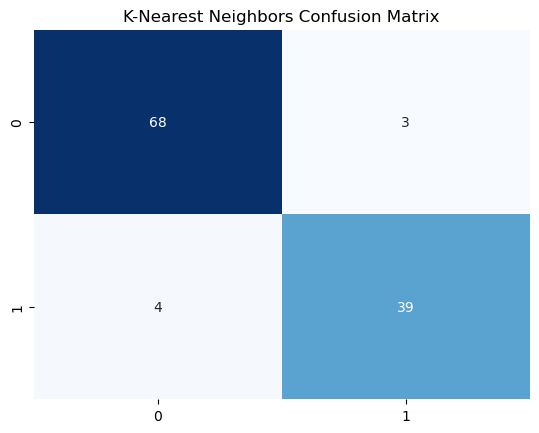

In [29]:
ytest_pred = dt.predict(X_test)
ytrain_pred = dt.predict(X_train)
cm = confusion_matrix(y_test, ytest_pred)
dt_train_acc = round(accuracy_score(y_train,ytrain_pred)*100,2)
dt_test_acc = round(accuracy_score(y_test,ytest_pred)*100,2)
print('Test Accuracy = ' , dt_test_acc,' %')
print('Train Accuracy = ' , dt_train_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('K-Nearest Neighbors Confusion Matrix');

In [65]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Decision Tree'
    ],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,dt_train_acc
    ],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,dt_test_acc
    ]
})
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
2,Decision Tree,100.00,94.74
0,Logistic Regression,96.70,98.25
1,K Nearest Neighbors,95.16,93.86


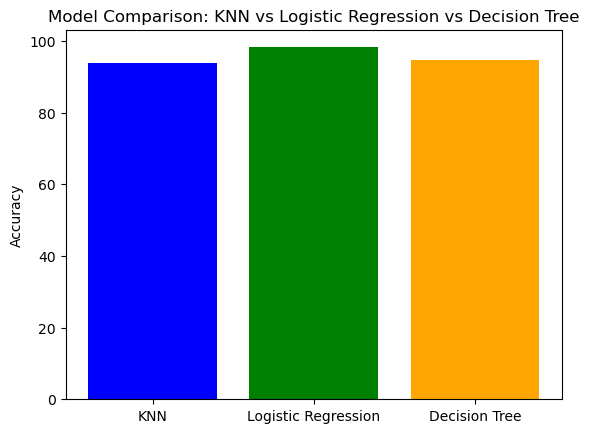



Accuracy of KNN: 93.86

Accuracy of Logistic Regression: 98.25



"if((lr_test_acc > knn_test_acc) and (lr_test_acc > dt_test_acc)):\n  print('Accuracy of Logistic Regression is good than KNN and DT\n')\nelif(knn_test_acc > lr_test_acc> dt_test_acc):\n  print('Accuracy of KNN is good than Logistic Regression and DT\n')\nelse(knn_test_acc > lr_test_acc> dt_test_acc):\n  print('Accuracy of KNN is good than Logistic Regression and DT\n')"

In [66]:
models = ['KNN', 'Logistic Regression','Decision Tree']
accuracies = [ knn_test_acc,lr_test_acc,dt_test_acc]

plt.bar(models, accuracies, color=['blue', 'green','orange'])
plt.title('Model Comparison: KNN vs Logistic Regression vs Decision Tree')
plt.ylabel('Accuracy')
plt.show()

print(f'\n\nAccuracy of KNN: {knn_test_acc:.2f}\n')
print(f'Accuracy of Logistic Regression: {lr_test_acc:.2f}\n')
'''if((lr_test_acc > knn_test_acc) and (lr_test_acc > dt_test_acc)):
  print('Accuracy of Logistic Regression is good than KNN and DT\n')
elif(knn_test_acc > lr_test_acc> dt_test_acc):
  print('Accuracy of KNN is good than Logistic Regression and DT\n')
else(knn_test_acc > lr_test_acc> dt_test_acc):
  print('Accuracy of KNN is good than Logistic Regression and DT\n')'''
